In [5]:
import numpy as np
from math import sqrt

def HOLY_JESUS_it_is_SVD_by_OLEG(a):
    m = a @ a.T
    s, u = np.linalg.eig(m)
    return np.sort(s)[: : -1]

def sorting_eig(s, u):
    i = 0
    while (i < len(s)):
        if (s[i] == 0):
            s = np.delete(s, i)
            u = np.delete(u, i, axis = 1)
            i -= 1
        i += 1
    order = np.argsort(s)
    s_res = s.copy()
    u_res = np.zeros(u.T.shape)
    for i in range(len(order)):
        s_res[i] = s[order[i]]
        u_res[i] = u.T[order[i]]
    return s_res[: :-1], u_res.T[:, : : -1]

def svd(a):
    if a.shape[0] >= a.shape[1]:
        m = a @ a.T
        s, u = np.linalg.eig(m)
        s, u = sorting_eig(s, u)
        s = np.diagflat(s)
        s_inv = s.copy()
        for i in range(len(s)):
            s_inv[i][i] = s_inv[i][i] ** (-1)
        v = s_inv @ u.T @ a
        return u, s, v

    m = a.T @ a
    s, v = np.linalg.eig(m)
    s, v = sorting_eig(s, v)
    s = np.diagflat(s)
    s_inv = s.copy()
    for i in range(len(s)):
        s_inv[i][i] = s_inv[i][i] ** (-1)
    u = s_inv @ v.T @ a
    return u, s, v

In [6]:
u, s, v = svd(np.array([[1, 1, 0],
                        [1, 1, 0],
                        [0, 0, 1],
                        [1, 0, -1]]))
print(u @ s @ v, sep = '\n')

[[  1.00000000e+00   1.00000000e+00   2.55222486e-16]
 [  1.00000000e+00   1.00000000e+00   1.19249298e-17]
 [  2.77555756e-17  -8.32667268e-17   1.00000000e+00]
 [  1.00000000e+00  -3.60822483e-16  -1.00000000e+00]]


In [10]:
# try to use only first five eighvalues
def try_kill_big_ei(image, alpha = 5):
    u, s, v = svd(image)
    s = s[alpha:, alpha:]
    u = u[:, alpha:]
    v = v[alpha:, :]
    return u @ s @ v

In [11]:
def try_kill_low_ei(image, alpha = 5):
    u, s, v = svd(image)
    s = s[:alpha, :alpha]
    u = u[:, :alpha]
    v = v[:alpha, :]
    return u @ s @ v

In [12]:
def try_kill_low_svd(image, alpha = 0.3):
    u, s, v = svd(image)
    size = int(0.7 * s.shape[0])
    s = s[:size, :size]
    u = u[:, :size]
    v = v[:size, :]
    return u, s, v

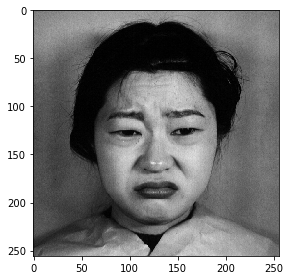

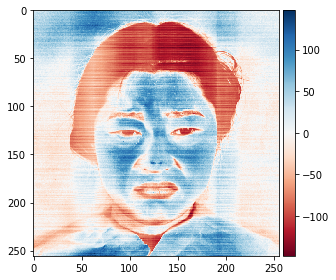

/usr/local/lib/python3.5/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


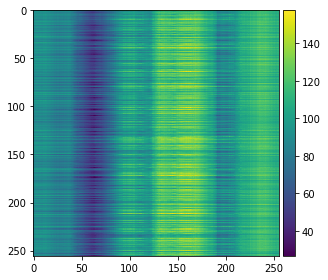

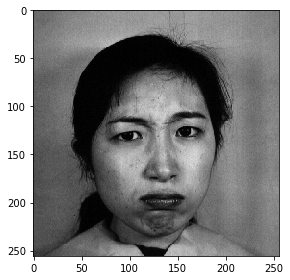

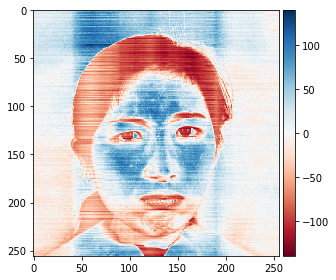

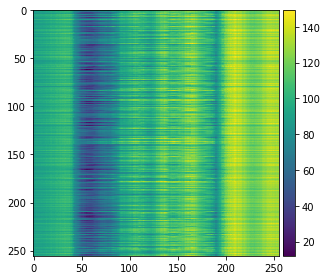

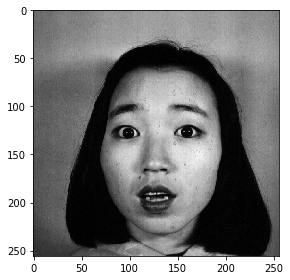

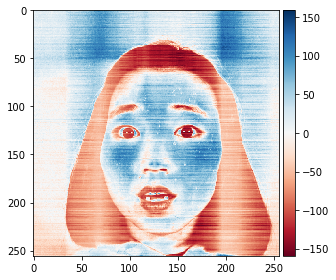

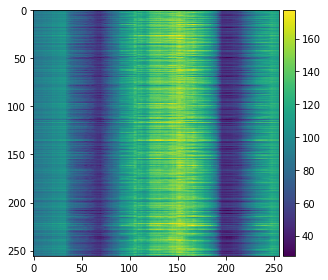

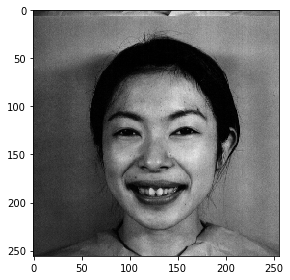

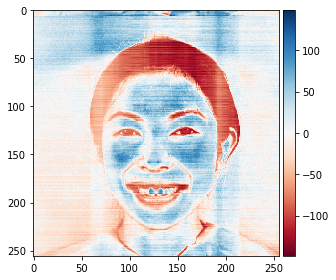

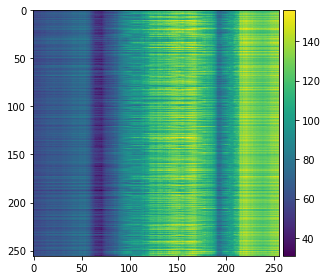

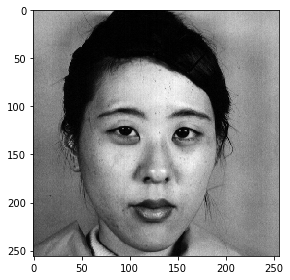

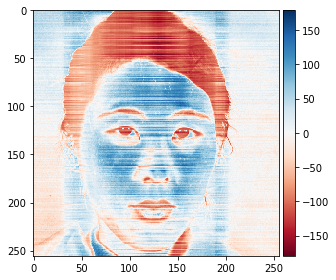

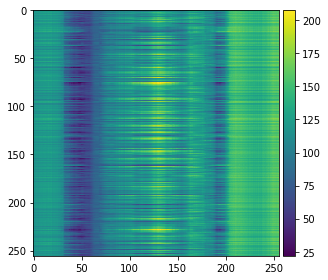

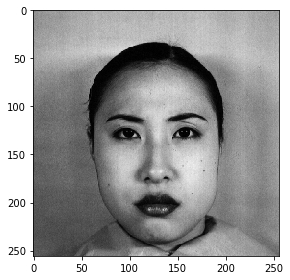

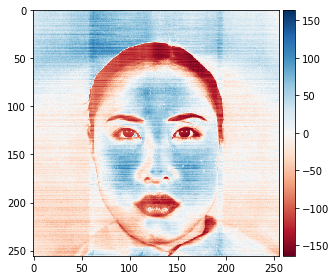

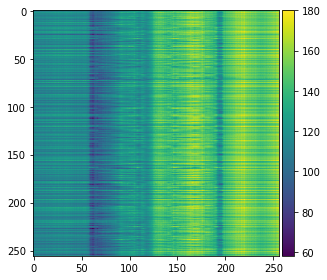

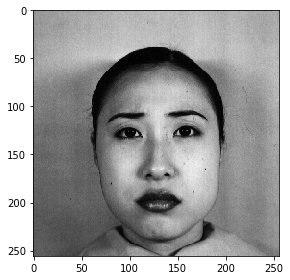

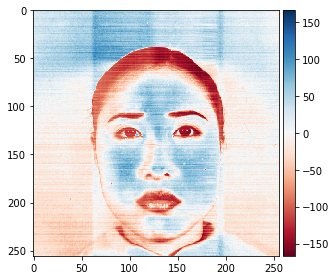

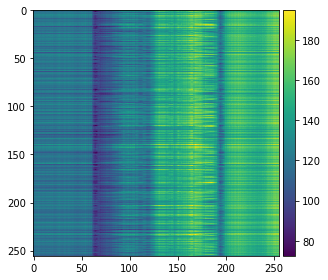

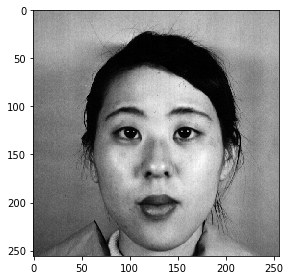

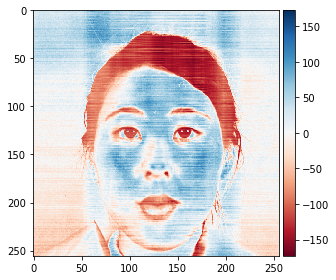

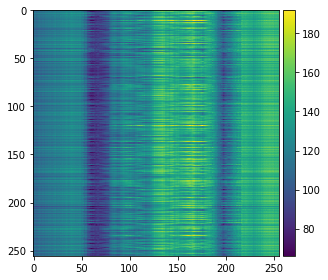

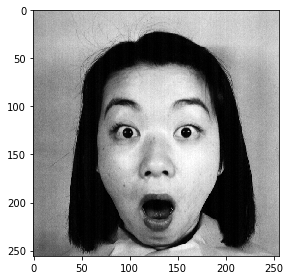

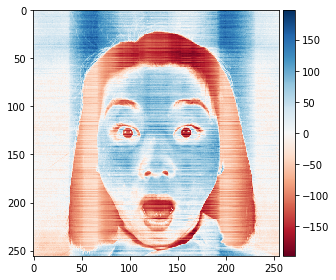

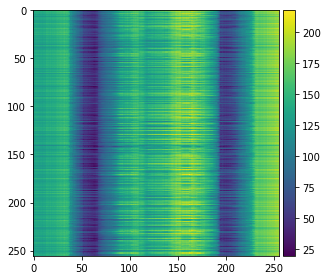

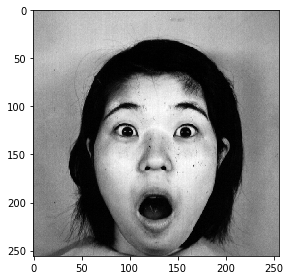

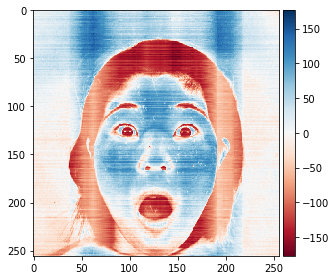

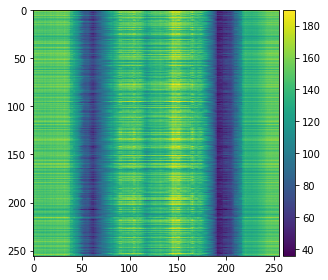

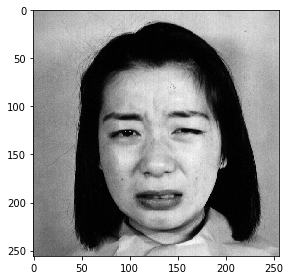

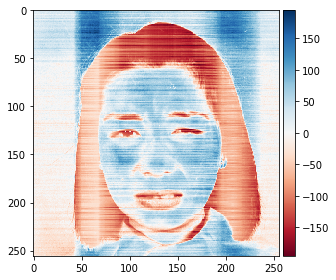

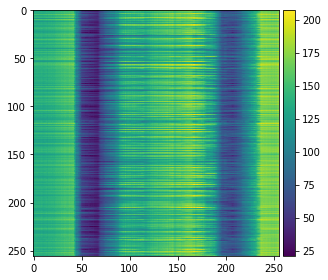

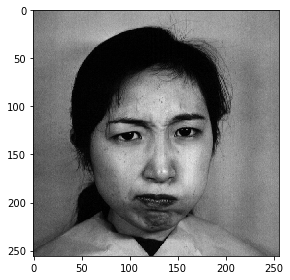

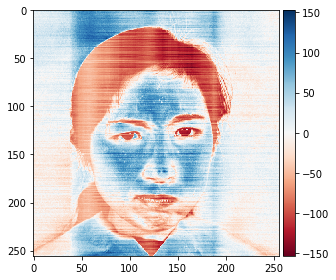

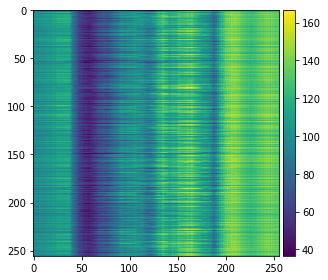

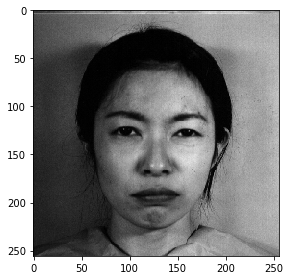

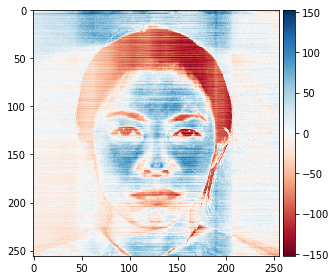

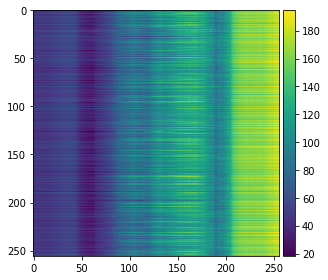

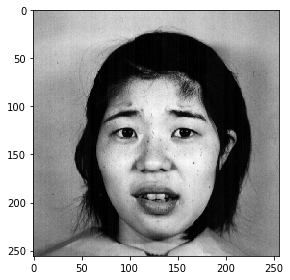

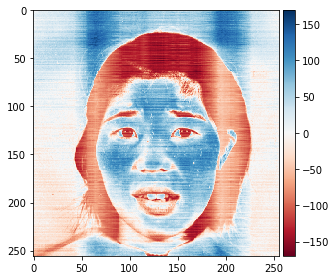

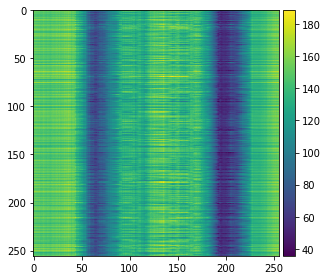

KeyboardInterrupt: 

In [13]:
from skimage import io
from PIL import Image

files = os.listdir(path="jaffe")
for name in files:
    im = np.array(Image.open('jaffe/' + name))
    io.imshow(im)
    plt.show()
    io.imshow(try_kill_big_ei(im))
    plt.show()
    io.imshow(try_kill_low_ei(im))
    plt.show()

In [15]:
from PIL import Image
import numpy as np
import os
from math import sqrt

files = os.listdir(path="jaffe")

# happy 0, sad 1, surprise 2,
# angry 3, disgust 4, fear 5, neutral 6
US = {"HA": [], "SA":[], "SU":[]
                  ,"AN":[], "DI":[], "FE":[], "NE":[]}


data = {"HA": [], "SA":[], "SU":[]
       ,"AN":[], "DI":[], "FE":[], "NE":[]}


for name in files:
    im = Image.open('jaffe/' + name)
    data[name[3:5]].append(np.array(im))

train = {"HA": [], "SA":[], "SU":[]
       ,"AN":[], "DI":[], "FE":[], "NE":[]}

for key in data:
    train[key] = np.mean(np.copy(data[key][:25]), axis=0)

#Image.fromarray(train["DI"]).show()

for key in train:
    US[key] = HOLY_JESUS_it_is_SVD_by_OLEG(train[key])

print("OK")


correct = 0
total = 0
for key in data:
    for sample in data[key][25:]:
        dist = -1
        ans = ''
        this_US = HOLY_JESUS_it_is_SVD_by_OLEG(sample)
        for emo in US:
            if dist == -1:
                dist = np.sqrt(np.sum((US[emo] - this_US) ** 2))
                ans = emo
            else:
                if np.sqrt(np.sum((US[emo] - this_US) ** 2)) < dist:
                    dist = np.sqrt(np.sum((US[emo] - this_US) ** 2))
                    ans = emo

        print(ans, key)
        if ans == key:
            correct += 1
        total += 1

print(int(correct/total * 100 + 0.5), "%")

OK
FE HA
FE HA
FE HA
FE HA
FE HA
FE HA
FE NE
FE NE
FE NE
FE NE
FE NE
FE SA
FE SA
FE SA
FE SA
FE SA
FE SA
FE AN
FE AN
FE AN
FE AN
FE AN
FE FE
FE FE
FE FE
FE FE
FE FE
FE FE
FE FE
FE SU
FE SU
FE SU
FE SU
FE SU
FE DI
FE DI
FE DI
FE DI
18 %


In [19]:
from PIL import Image
import numpy as np
import os
from math import sqrt

files = os.listdir(path="jaffe")

# happy 0, sad 1, surprise 2,
# angry 3, disgust 4, fear 5, neutral 6
US = {"HA": [], "SA":[], "SU":[]
                  ,"AN":[], "DI":[], "FE":[], "NE":[]}


data = {"HA": [], "SA":[], "SU":[]
       ,"AN":[], "DI":[], "FE":[], "NE":[]}


for name in files:
    im = Image.open('jaffe/' + name)
    data[name[3:5]].append(np.array(im))

train = {"HA": [], "SA":[], "SU":[]
       ,"AN":[], "DI":[], "FE":[], "NE":[]}

for key in data:
    train[key] = np.mean(np.copy(data[key][:25]), axis=0)

#Image.fromarray(train["DI"]).show()

for key in train:
    U, S, V = np.linalg.svd(train[key])
    US[key] = U @ S

print("OK")


correct = 0
total = 0
for key in data:
    for sample in data[key][25:]:
        dist = -1
        ans = ''
        U, S, V = np.linalg.svd(sample)
        this_US = U @ S
        for emo in US:
            if dist == -1:
                dist = np.sqrt(np.sum((US[emo] - this_US) ** 2))
                ans = emo
            else:
                if np.sqrt(np.sum((US[emo] - this_US) ** 2)) < dist:
                    dist = np.sqrt(np.sum((US[emo] - this_US) ** 2))
                    ans = emo

        print(ans, key)
        if ans == key:
            correct += 1
        total += 1

print(int(correct/total * 100 + 0.5), "%")

OK
FE HA
AN HA
AN HA
SA HA
NE HA
HA HA
NE NE
NE NE
SA NE
AN NE
HA NE
AN SA
HA SA
SA SA
SA SA
HA SA
HA SA
NE AN
AN AN
AN AN
AN AN
AN AN
FE FE
FE FE
FE FE
SU FE
AN FE
SU FE
FE FE
DI SU
SU SU
FE SU
AN SU
FE SU
DI DI
DI DI
AN DI
DI DI
45 %


In [17]:
from PIL import Image
import numpy as np
import os
from math import sqrt

files = os.listdir(path="jaffe")

# happy 0, sad 1, surprise 2,
# angry 3, disgust 4, fear 5, neutral 6
US = {"HA": [], "SA":[], "SU":[]
                  ,"AN":[], "DI":[], "NE":[]}


data = {"HA": [], "SA":[], "SU":[]
       ,"AN":[], "DI":[], "NE":[]}


for name in files:
    im = Image.open('jaffe/' + name)
    if (name[3:5] == "FE"):
        continue
    data[name[3:5]].append(np.array(im))

train = {"HA": [], "SA":[], "SU":[]
       ,"AN":[], "DI":[], "NE":[]}

for key in data:
    train[key] = np.mean(np.copy(data[key][:25]), axis=0)

#Image.fromarray(train["DI"]).show()

for key in train:
    U, S, V = np.linalg.svd(train[key])
    US[key] = np.dot(U, S)

print("OK")


correct = 0
total = 0
for key in data:
    for sample in data[key][25:]:
        dist = -1
        ans = ''
        U, S, V = np.linalg.svd(sample)
        this_US = np.dot(U, S)
        for emo in US:
            if dist == -1:
                dist = np.sqrt(np.sum((US[emo] - this_US) ** 2))
                ans = emo
            else:
                if np.sqrt(np.sum((US[emo] - this_US) ** 2)) < dist:
                    dist = np.sqrt(np.sum((US[emo] - this_US) ** 2))
                    ans = emo

        print(ans, key)
        if ans == key:
            correct += 1
        total += 1

print(int(correct/total * 100 + 0.5), "%")

OK
SA HA
AN HA
AN HA
SA HA
NE HA
HA HA
NE NE
NE NE
SA NE
AN NE
HA NE
AN SA
HA SA
SA SA
SA SA
HA SA
HA SA
NE AN
AN AN
AN AN
AN AN
AN AN
DI SU
SU SU
SU SU
AN SU
SU SU
DI DI
DI DI
AN DI
DI DI
48 %


In [18]:
from PIL import Image
import numpy as np
import os
from math import sqrt

files = os.listdir(path="jaffe")

# happy 0, sad 1, surprise 2,
# angry 3, disgust 4, fear 5, neutral 6
US = {"HA": [], "SA":[], "SU":[]
                  ,"AN":[], "DI":[], "FE":[], "NE":[]}


data = {"HA": [], "SA":[], "SU":[]
       ,"AN":[], "DI":[], "FE":[], "NE":[]}


for name in files:
    im = Image.open('jaffe/' + name)
    data[name[3:5]].append(np.array(im))

train = {"HA": [], "SA":[], "SU":[]
       ,"AN":[], "DI":[], "FE":[], "NE":[]}

for key in data:
    train[key] = np.mean(np.copy(data[key][:25]), axis=0)

#Image.fromarray(train["DI"]).show()

for key in train:
    U, S, V = np.linalg.svd(train[key])
    US[key] = np.dot(S, V)

print("OK")


correct = 0
total = 0
for key in data:
    for sample in data[key][25:]:
        dist = -1
        ans = ''
        U, S, V = np.linalg.svd(sample)
        this_US = np.dot(S, V)
        for emo in US:
            if dist == -1:
                dist = np.sqrt(np.sum((US[emo] - this_US) ** 2))
                ans = emo
            else:
                if np.sqrt(np.sum((US[emo] - this_US) ** 2)) < dist:
                    dist = np.sqrt(np.sum((US[emo] - this_US) ** 2))
                    ans = emo

        print(ans, key)
        if ans == key:
            correct += 1
        total += 1

print(int(correct/total * 100 + 0.5), "%")

OK
SA HA
FE HA
FE HA
SA HA
NE HA
HA HA
NE NE
FE NE
SA NE
SU NE
HA NE
AN SA
HA SA
SU SA
SA SA
HA SA
HA SA
HA AN
SU AN
AN AN
HA AN
AN AN
FE FE
SA FE
DI FE
NE FE
FE FE
SU FE
FE FE
DI SU
FE SU
FE SU
HA SU
FE SU
HA DI
HA DI
HA DI
FE DI
21 %


In [120]:
from PIL import Image
import numpy as np
import os
from math import sqrt, exp
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_squared_error

data = {"HA": [], "SA":[], "SU":[]
       ,"AN":[], "DI":[], "FE":[], "NE":[]}

incoder = {"HA": 1, "SA": 2, "SU": 3
       ,"AN":4, "DI":5, "FE":6, "NE":7}

decoder = {1: "HA", 2: "SA", 3: "SU"
       ,4: "AN", 5:"DI", 6:"FE", 7:"NE"}

train = {"HA": [], "SA":[], "SU":[]
       ,"AN":[], "DI":[], "FE":[], "NE":[]}

test = {"HA": [], "SA":[], "SU":[]
       ,"AN":[], "DI":[], "FE":[], "NE":[]}

def split_data():
    files = os.listdir(path="jaffe")
    for name in files:
        im = Image.open('jaffe/' + name)
        data[name[3:5]].append(np.array(im))
    for key in data:
        train[key] = np.copy(data[key][:25])
        test[key] = np.copy(data[key][25:])
    return train, test

def make_data(data):
    features = 0
    labels = []
    for key in incoder:
        for im in data[key]:
            U, S, V = np.linalg.svd(im)
            if (type(features) == int):
                features = np.array(U @ S)
            else:
                features = np.vstack((features, U @ S))
            labels.append(incoder[key])
    return np.array(features), np.array(labels)

def fit_classify_score(train_features, train_labels, test_features, test_labels):
    clf = SVC(kernel='poly', degree = 4).fit(train_features, train_labels)
    # clf = LinearSVC(loss = 'mse').fit(train_features, train_labels)
    return clf.score(test_features, test_labels)

In [122]:
train, test = split_data()
train_features, train_labels = make_data(train)
test_features, test_labels = make_data(test)
fit_classify_score(train_features, train_labels, test_features, test_labels)

0.84063745019920322

In [123]:
train, test = split_data()
train_features, train_labels = make_data(train)
test_features, test_labels = make_data(test)
fit_classify_score(train_features, train_labels, test_features, test_labels)

0.87068965517241381

Try to use HOG (https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients)

In [130]:
from numpy import ones, arctan2, zeros, append, empty, dot
from skimage.filters import sobel_h, sobel_v
from skimage.transform import resize
from math import pi
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

def way(grad):
    if (grad == pi):
        return 8
    return int(9 * grad / pi)

def extract_hog(img):
    image = resize(img, (64, 64), mode = 'reflect')
    sobelx = sobel_v(image)
    sobely = sobel_h(image)
    modul_grad = (sobelx ** 2 + sobely ** 2) ** (1 / 2)
    way_grad = abs(arctan2(sobely, sobelx))
    gistogram_places = zeros((8, 8, 9))
    for x in range(8):
        for y in range(8):
            for i in range(8):
                for j in range(8):
                    pixelx = 8 * x + i
                    pixely = 8 * y + j
                    gistogram_places[x, y, way(way_grad[pixelx, pixely])] += modul_grad[pixelx, pixely]
    eps = 0.0000000001
    for x in range(7):
        for y in range(7):
            v = gistogram_places[x, y]
            v = append(v, gistogram_places[x + 1, y])
            v = append(v, gistogram_places[x, y + 1])
            v = append(v, gistogram_places[x + 1, y + 1])
            if ((x == 0) and (y == 0)):
                res = v / ((dot(v, v) + eps) ** (1 / 2))
                created = 0
            else:
                res = append(res, v / ((dot(v, v) + eps) ** (1 / 2)))
    return res

In [131]:
def make_data_hog(data):
    features = 0
    labels = []
    for key in incoder:
        for im in data[key]:
            if (type(features) == int):
                features = np.array(extract_hog(im))
            else:
                features = np.vstack((features, extract_hog(im)))
            labels.append(incoder[key])
    return np.array(features), np.array(labels)

In [133]:
train, test = split_data()
train_features, train_labels = make_data_hog(train)
test_features, test_labels = make_data_hog(test)
fit_classify_score(train_features, train_labels, test_features, test_labels)

0.64437689969604861